In [ ]:
import nltk                                
import matplotlib.pyplot as plt          
import pandas as pd
import numpy as np
import re
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import random

In [ ]:
train_tweets = pd.read_csv('/content/drive/MyDrive/train_lsh.csv', encoding='latin-1')
train_tweets = train_tweets.to_numpy()
train_sentiments = np.concatenate(pd.read_csv('/content/drive/MyDrive/train_sentiments.csv', encoding='latin-1').to_numpy())

train_sentiments  = train_sentiments[~np.isnan(train_tweets).any(axis=1)]
train_tweets = train_tweets [~np.isnan(train_tweets).any(axis=1)]
for i in range(0,train_tweets.shape[1]):
    train_tweets[:,i] = (train_tweets[:,i] - np.nanmean(train_tweets[:,i]))/ np.nanvar(train_tweets[:,i])

In [ ]:
test_tweets = pd.read_csv('/content/drive/MyDrive/test_lsh.csv', encoding='latin-1')
test_tweets = test_tweets.to_numpy()
test_sentiments = np.concatenate(pd.read_csv('/content/drive/MyDrive/test_sentiments.csv', encoding='latin-1').to_numpy())

test_sentiments = test_sentiments[~np.isnan(test_tweets).any(axis=1)]
test_tweets = test_tweets[~np.isnan(test_tweets).any(axis=1)]
for i in range(0,test_tweets.shape[1]):
 test_tweets[:,i] = (test_tweets[:,i] - np.nanmean(test_tweets[:,i]))/ np.nanvar(test_tweets[:,i])


In [ ]:
def knn_classificator(x_train, y_train, x_test, y_test, k):
  '''
  Input:
    x_train - train data
    y_train - train labels
    x_test - test data
    y_test - test labels
    k - k nearest neighbours
  Output:
    accuracy for train and test data in persentage
  '''
  knn = KNeighborsClassifier(n_neighbors = k, metric= 'cosine')
  knn.fit(x_train, y_train)
  y_pred_train = knn.predict(x_train)
  y_pred_test = knn.predict(x_test)

  return sum(y_pred_train == y_train)/len(y_train)*100,sum(y_pred_test == y_test)/len(y_test)*100

In [ ]:
def cross_validation(x, y, ind, k):
  '''
  Input:
    x - data
    y - labels
    ind - indexes for separation data in five classes
    k - number of k nearest neighbours for knn classifier
  Output:
    accuracy on train and accuracy on test data
  '''
  acc_train = []
  acc_test = []
  
  for i in range(0,5):
    acc = knn_classificator(x[ind!=i,:], y[ind!=i], x[ind==i,:], y[ind==i], k)
    acc_train.append(acc[0])
    acc_test.append(acc[1])
    
  return sum(acc_train)/5, sum(acc_test)/5

In [ ]:
def split_train_validation(num):
  '''
    Input:
      num - number od elements of training set

    Output:
      ind - array of indexes for 0-5 classes
  '''

  ind = np.zeros(num)
  l = int(len(ind)/5)
  for i in range(1,5):
    if i == 5:
      ind[int(i*l):] = i
    else:
      ind[int(i*l):int((i+1)*l)] = i
    
  return ind

In [ ]:
# main program
acc_train = []
acc_val = []
k = [1,5,10,15,20,25,30]

ind = split_train_validation(len(train_tweets))
random.shuffle(ind)

for i in range(0,len(k)):
  acc = cross_validation(train_tweets, train_sentiments, ind, k[i])
  acc_train.append(acc[0])
  acc_val.append(acc[1])


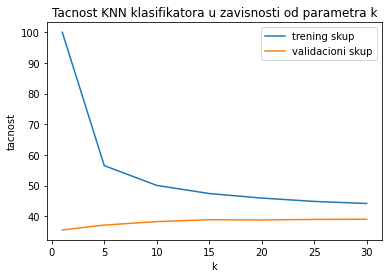

In [ ]:
# plot the results
plt.figure()
plt.plot(k,acc_train)
plt.plot(k,acc_val)
plt.title('Tacnost KNN klasifikatora u zavisnosti od parametra k')
plt.xlabel('k')
plt.ylabel('tacnost')
plt.legend(['trening skup','validacioni skup'])